# Quickstart

*This page follows fastai's [quickstart page](https://docs.fast.ai/quick_start.html) by quickly showing a few learning tasks. More will be added here as they are added to the library.*

FastAI.jl's learning tasks all use the same basic steps and code:

- create a [data container](../docs/data_containers.md)
- create a learning task
- create learner
- call a *fit* task
- make predictions or view results

In this quick start, we'll show these steps for a wide range of difference applications and datasets. As you'll see, the code in each case is extremely similar, despite the very different models and data being used.

In [1]:
]activate .

  Activating environment at `~/.julia/dev/FastAI/notebooks/Project.toml`


In [2]:
import CairoMakie
using FastAI

┌ Info: Precompiling CairoMakie [13f3f980-e62b-5c42-98c6-ff1f3baf88f0]
└ @ Base loading.jl:1342
┌ Info: Precompiling FastAI [5d0beca9-ade8-49ae-ad0b-a3cf890e669f]
└ @ Base loading.jl:1342


## Computer vision 

### Classification 

#### Single-label 

In [3]:
data, blocks = loaddataset("imagenette2-320", (Image, Label))
task = ImageClassificationSingle(blocks, size=(256, 256))
learner = tasklearner(task, data, callbacks=[ToGPU(), Metrics(accuracy)])
fitonecycle!(learner, 5, 0.033)

Epoch 1 TrainingPhase(): 100%|██████████████████████████| Time: 0:04:25m


┌───────────────┬───────┬─────────┬──────────┐
│         Phase │ Epoch │    Loss │ Accuracy │
├───────────────┼───────┼─────────┼──────────┤
│ TrainingPhase │   1.0 │ 1.97242 │  0.39778 │
└───────────────┴───────┴─────────┴──────────┘


Epoch 1 ValidationPhase(): 100%|████████████████████████| Time: 0:00:14


┌─────────────────┬───────┬─────────┬──────────┐
│           Phase │ Epoch │    Loss │ Accuracy │
├─────────────────┼───────┼─────────┼──────────┤
│ ValidationPhase │   1.0 │ 1.48969 │   0.5269 │
└─────────────────┴───────┴─────────┴──────────┘


Epoch 2 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:56


┌───────────────┬───────┬─────────┬──────────┐
│         Phase │ Epoch │    Loss │ Accuracy │
├───────────────┼───────┼─────────┼──────────┤
│ TrainingPhase │   2.0 │ 1.32481 │  0.57116 │
└───────────────┴───────┴─────────┴──────────┘


Epoch 2 ValidationPhase(): 100%|████████████████████████| Time: 0:00:05


┌─────────────────┬───────┬─────────┬──────────┐
│           Phase │ Epoch │    Loss │ Accuracy │
├─────────────────┼───────┼─────────┼──────────┤
│ ValidationPhase │   2.0 │ 1.29609 │  0.58396 │
└─────────────────┴───────┴─────────┴──────────┘


Epoch 3 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:56


┌───────────────┬───────┬─────────┬──────────┐
│         Phase │ Epoch │    Loss │ Accuracy │
├───────────────┼───────┼─────────┼──────────┤
│ TrainingPhase │   3.0 │ 1.07732 │  0.65053 │
└───────────────┴───────┴─────────┴──────────┘


Epoch 3 ValidationPhase(): 100%|████████████████████████| Time: 0:00:04


┌─────────────────┬───────┬─────────┬──────────┐
│           Phase │ Epoch │    Loss │ Accuracy │
├─────────────────┼───────┼─────────┼──────────┤
│ ValidationPhase │   3.0 │ 0.84394 │  0.73269 │
└─────────────────┴───────┴─────────┴──────────┘


Epoch 4 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:56


┌───────────────┬───────┬─────────┬──────────┐
│         Phase │ Epoch │    Loss │ Accuracy │
├───────────────┼───────┼─────────┼──────────┤
│ TrainingPhase │   4.0 │ 0.76976 │  0.75464 │
└───────────────┴───────┴─────────┴──────────┘


Epoch 4 ValidationPhase(): 100%|████████████████████████| Time: 0:00:04


┌─────────────────┬───────┬─────────┬──────────┐
│           Phase │ Epoch │    Loss │ Accuracy │
├─────────────────┼───────┼─────────┼──────────┤
│ ValidationPhase │   4.0 │ 0.63991 │  0.79958 │
└─────────────────┴───────┴─────────┴──────────┘


Epoch 5 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:55


┌───────────────┬───────┬─────────┬──────────┐
│         Phase │ Epoch │    Loss │ Accuracy │
├───────────────┼───────┼─────────┼──────────┤
│ TrainingPhase │   5.0 │ 0.54532 │  0.82431 │
└───────────────┴───────┴─────────┴──────────┘


Epoch 5 ValidationPhase(): 100%|████████████████████████| Time: 0:00:04


┌─────────────────┬───────┬─────────┬──────────┐
│           Phase │ Epoch │    Loss │ Accuracy │
├─────────────────┼───────┼─────────┼──────────┤
│ ValidationPhase │   5.0 │ 0.53793 │  0.82539 │
└─────────────────┴───────┴─────────┴──────────┘


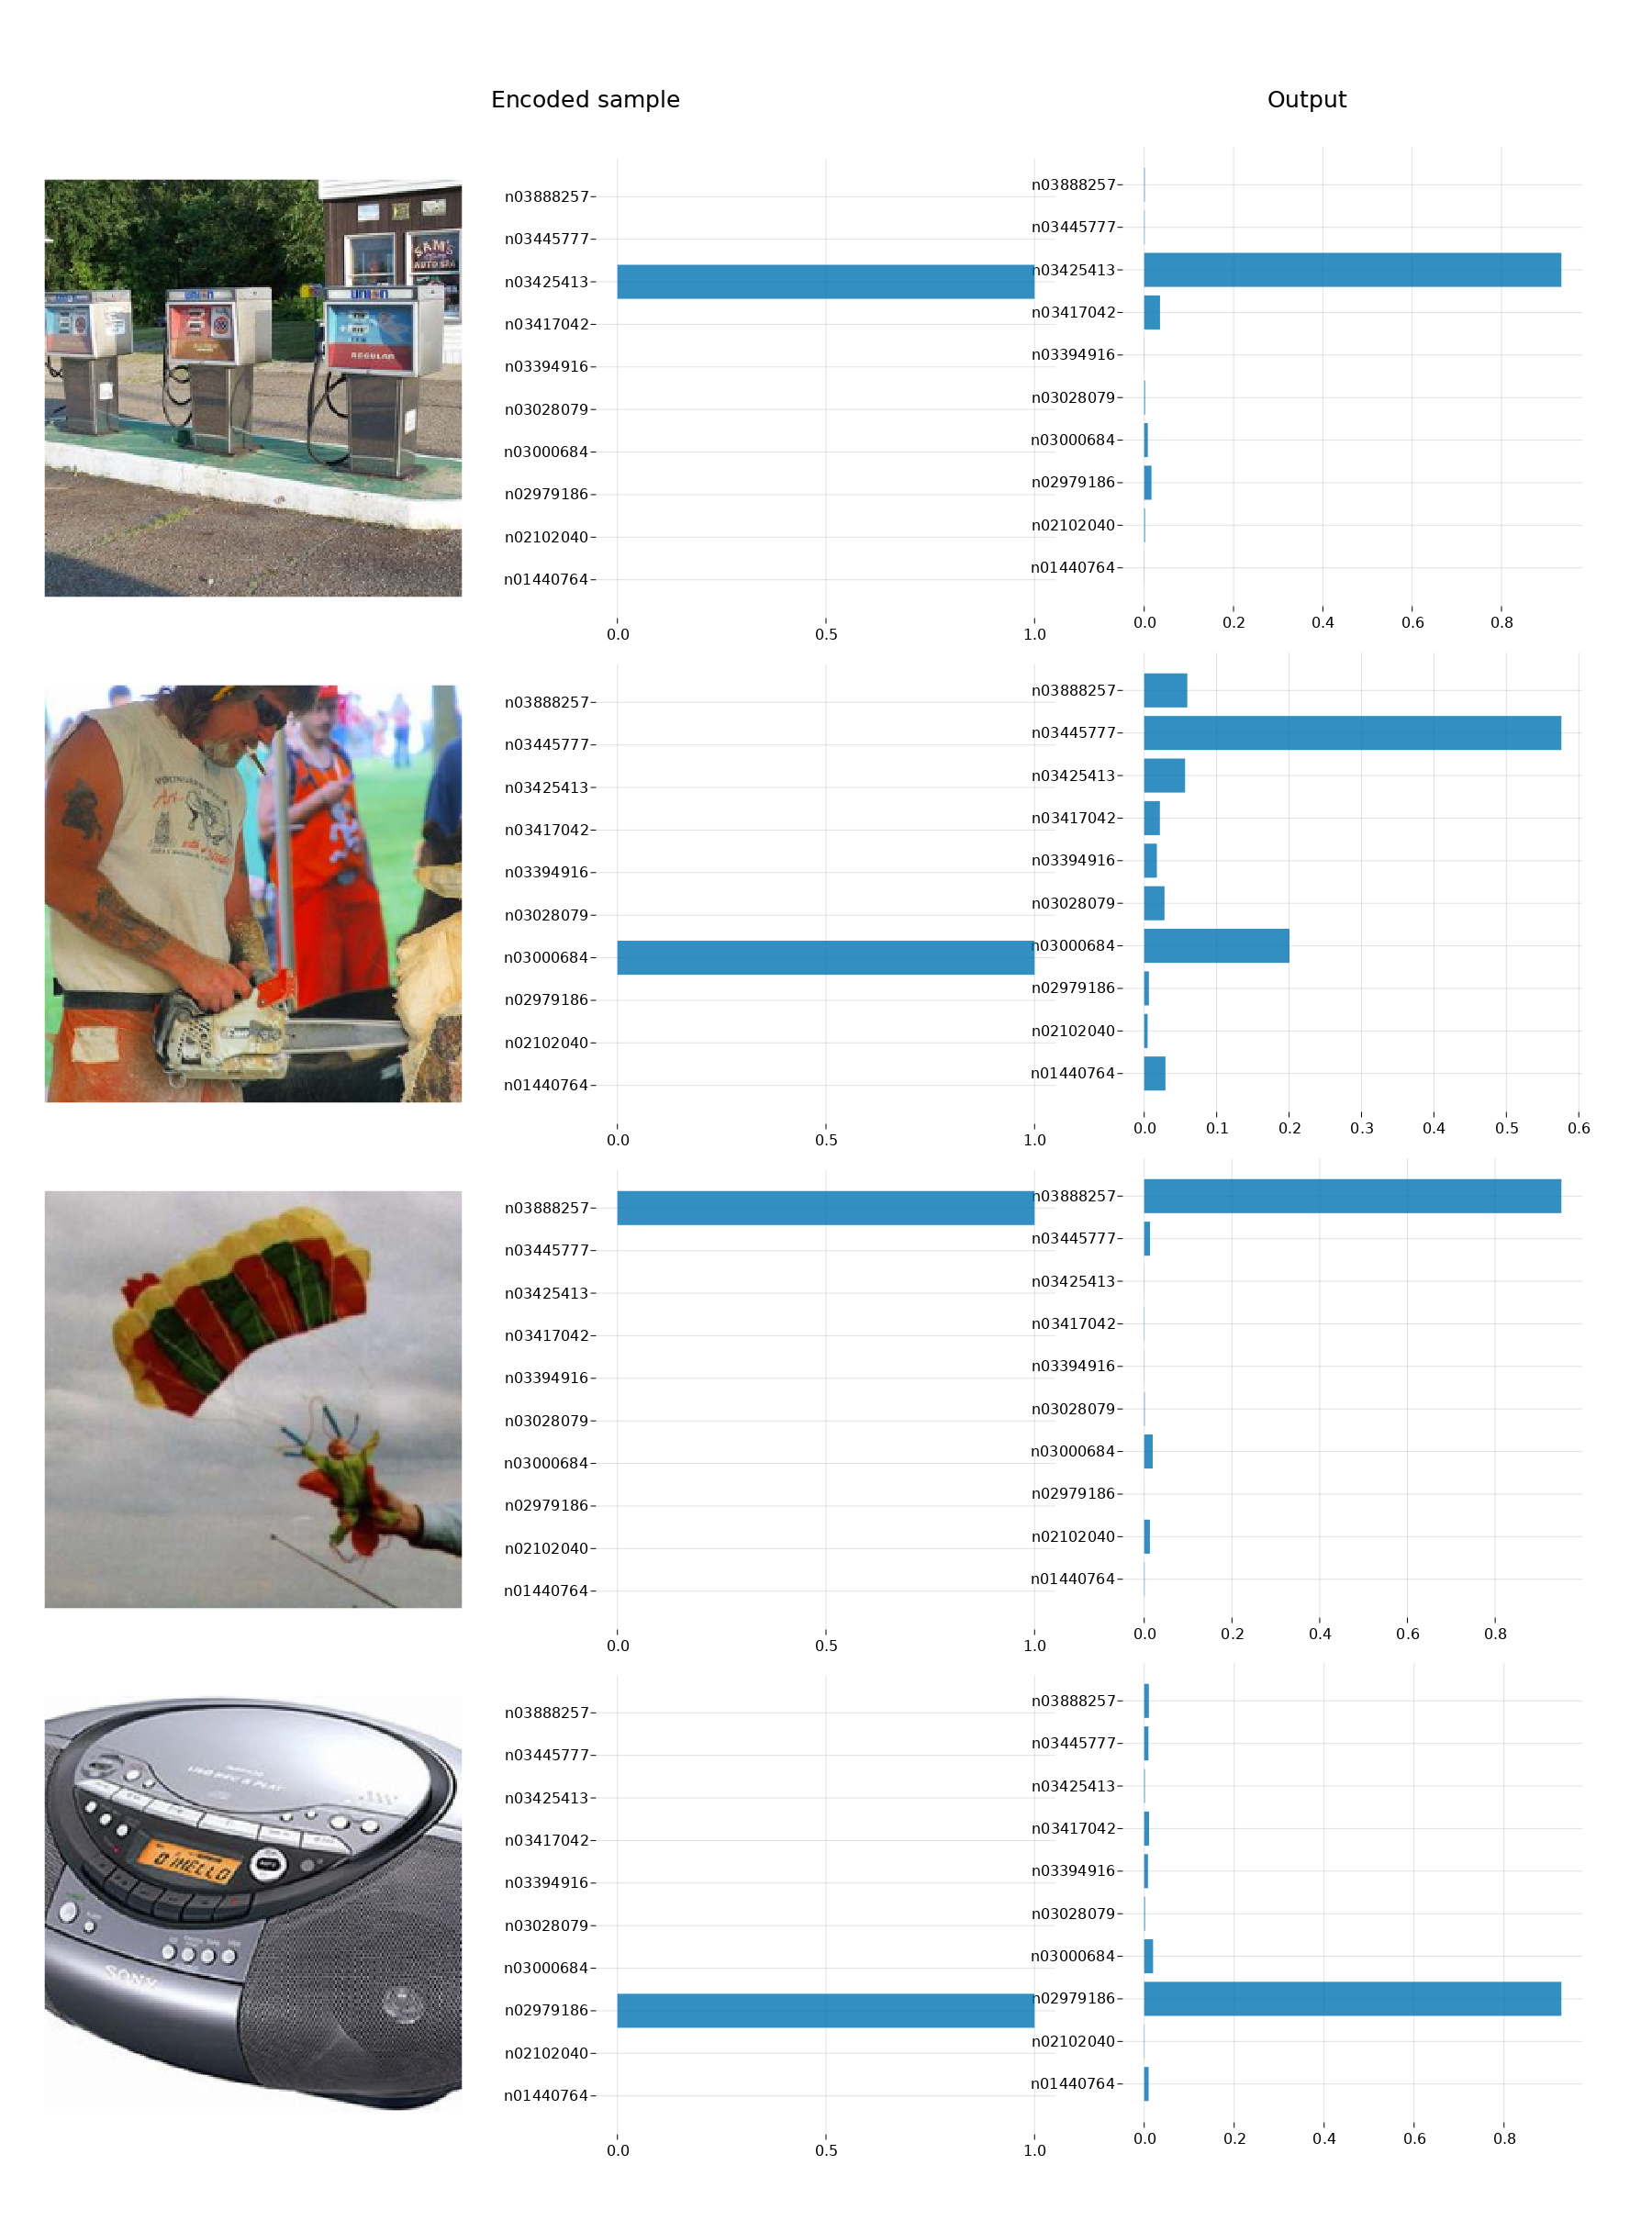

In [15]:
showoutputs(task, learner)

#### Multi-label classification 

In [17]:
data, blocks = loaddataset("pascal_2007", (Image, LabelMulti))
task = ImageClassificationMulti(blocks)
learner = tasklearner(task, data, callbacks=[ToGPU(), Metrics(accuracy_thresh)])
fitonecycle!(learner, 5, 0.033)

Epoch 1 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:09


┌───────────────┬───────┬─────────┬─────────────────┐
│         Phase │ Epoch │    Loss │ Accuracy_thresh │
├───────────────┼───────┼─────────┼─────────────────┤
│ TrainingPhase │   1.0 │ 0.36548 │          0.8588 │
└───────────────┴───────┴─────────┴─────────────────┘


Epoch 1 ValidationPhase(): 100%|████████████████████████| Time: 0:00:01


┌─────────────────┬───────┬─────────┬─────────────────┐
│           Phase │ Epoch │    Loss │ Accuracy_thresh │
├─────────────────┼───────┼─────────┼─────────────────┤
│ ValidationPhase │   1.0 │ 0.25181 │         0.92066 │
└─────────────────┴───────┴─────────┴─────────────────┘


Epoch 2 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:08


┌───────────────┬───────┬─────────┬─────────────────┐
│         Phase │ Epoch │    Loss │ Accuracy_thresh │
├───────────────┼───────┼─────────┼─────────────────┤
│ TrainingPhase │   2.0 │ 0.23486 │         0.92187 │
└───────────────┴───────┴─────────┴─────────────────┘


Epoch 2 ValidationPhase(): 100%|████████████████████████| Time: 0:00:00


┌─────────────────┬───────┬─────────┬─────────────────┐
│           Phase │ Epoch │    Loss │ Accuracy_thresh │
├─────────────────┼───────┼─────────┼─────────────────┤
│ ValidationPhase │   2.0 │ 0.24972 │         0.91715 │
└─────────────────┴───────┴─────────┴─────────────────┘


Epoch 3 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:08


┌───────────────┬───────┬─────────┬─────────────────┐
│         Phase │ Epoch │    Loss │ Accuracy_thresh │
├───────────────┼───────┼─────────┼─────────────────┤
│ TrainingPhase │   3.0 │ 0.22395 │         0.92288 │
└───────────────┴───────┴─────────┴─────────────────┘


Epoch 3 ValidationPhase(): 100%|████████████████████████| Time: 0:00:00


┌─────────────────┬───────┬─────────┬─────────────────┐
│           Phase │ Epoch │    Loss │ Accuracy_thresh │
├─────────────────┼───────┼─────────┼─────────────────┤
│ ValidationPhase │   3.0 │ 0.21873 │         0.92184 │
└─────────────────┴───────┴─────────┴─────────────────┘


Epoch 4 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:08


┌───────────────┬───────┬─────────┬─────────────────┐
│         Phase │ Epoch │    Loss │ Accuracy_thresh │
├───────────────┼───────┼─────────┼─────────────────┤
│ TrainingPhase │   4.0 │ 0.20917 │         0.92587 │
└───────────────┴───────┴─────────┴─────────────────┘


Epoch 4 ValidationPhase(): 100%|████████████████████████| Time: 0:00:00


┌─────────────────┬───────┬─────────┬─────────────────┐
│           Phase │ Epoch │    Loss │ Accuracy_thresh │
├─────────────────┼───────┼─────────┼─────────────────┤
│ ValidationPhase │   4.0 │ 0.20198 │          0.9268 │
└─────────────────┴───────┴─────────┴─────────────────┘


Epoch 5 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:08


┌───────────────┬───────┬─────────┬─────────────────┐
│         Phase │ Epoch │    Loss │ Accuracy_thresh │
├───────────────┼───────┼─────────┼─────────────────┤
│ TrainingPhase │   5.0 │ 0.19368 │           0.929 │
└───────────────┴───────┴─────────┴─────────────────┘


Epoch 5 ValidationPhase(): 100%|████████████████████████| Time: 0:00:00


┌─────────────────┬───────┬─────────┬─────────────────┐
│           Phase │ Epoch │    Loss │ Accuracy_thresh │
├─────────────────┼───────┼─────────┼─────────────────┤
│ ValidationPhase │   5.0 │ 0.19307 │         0.92859 │
└─────────────────┴───────┴─────────┴─────────────────┘


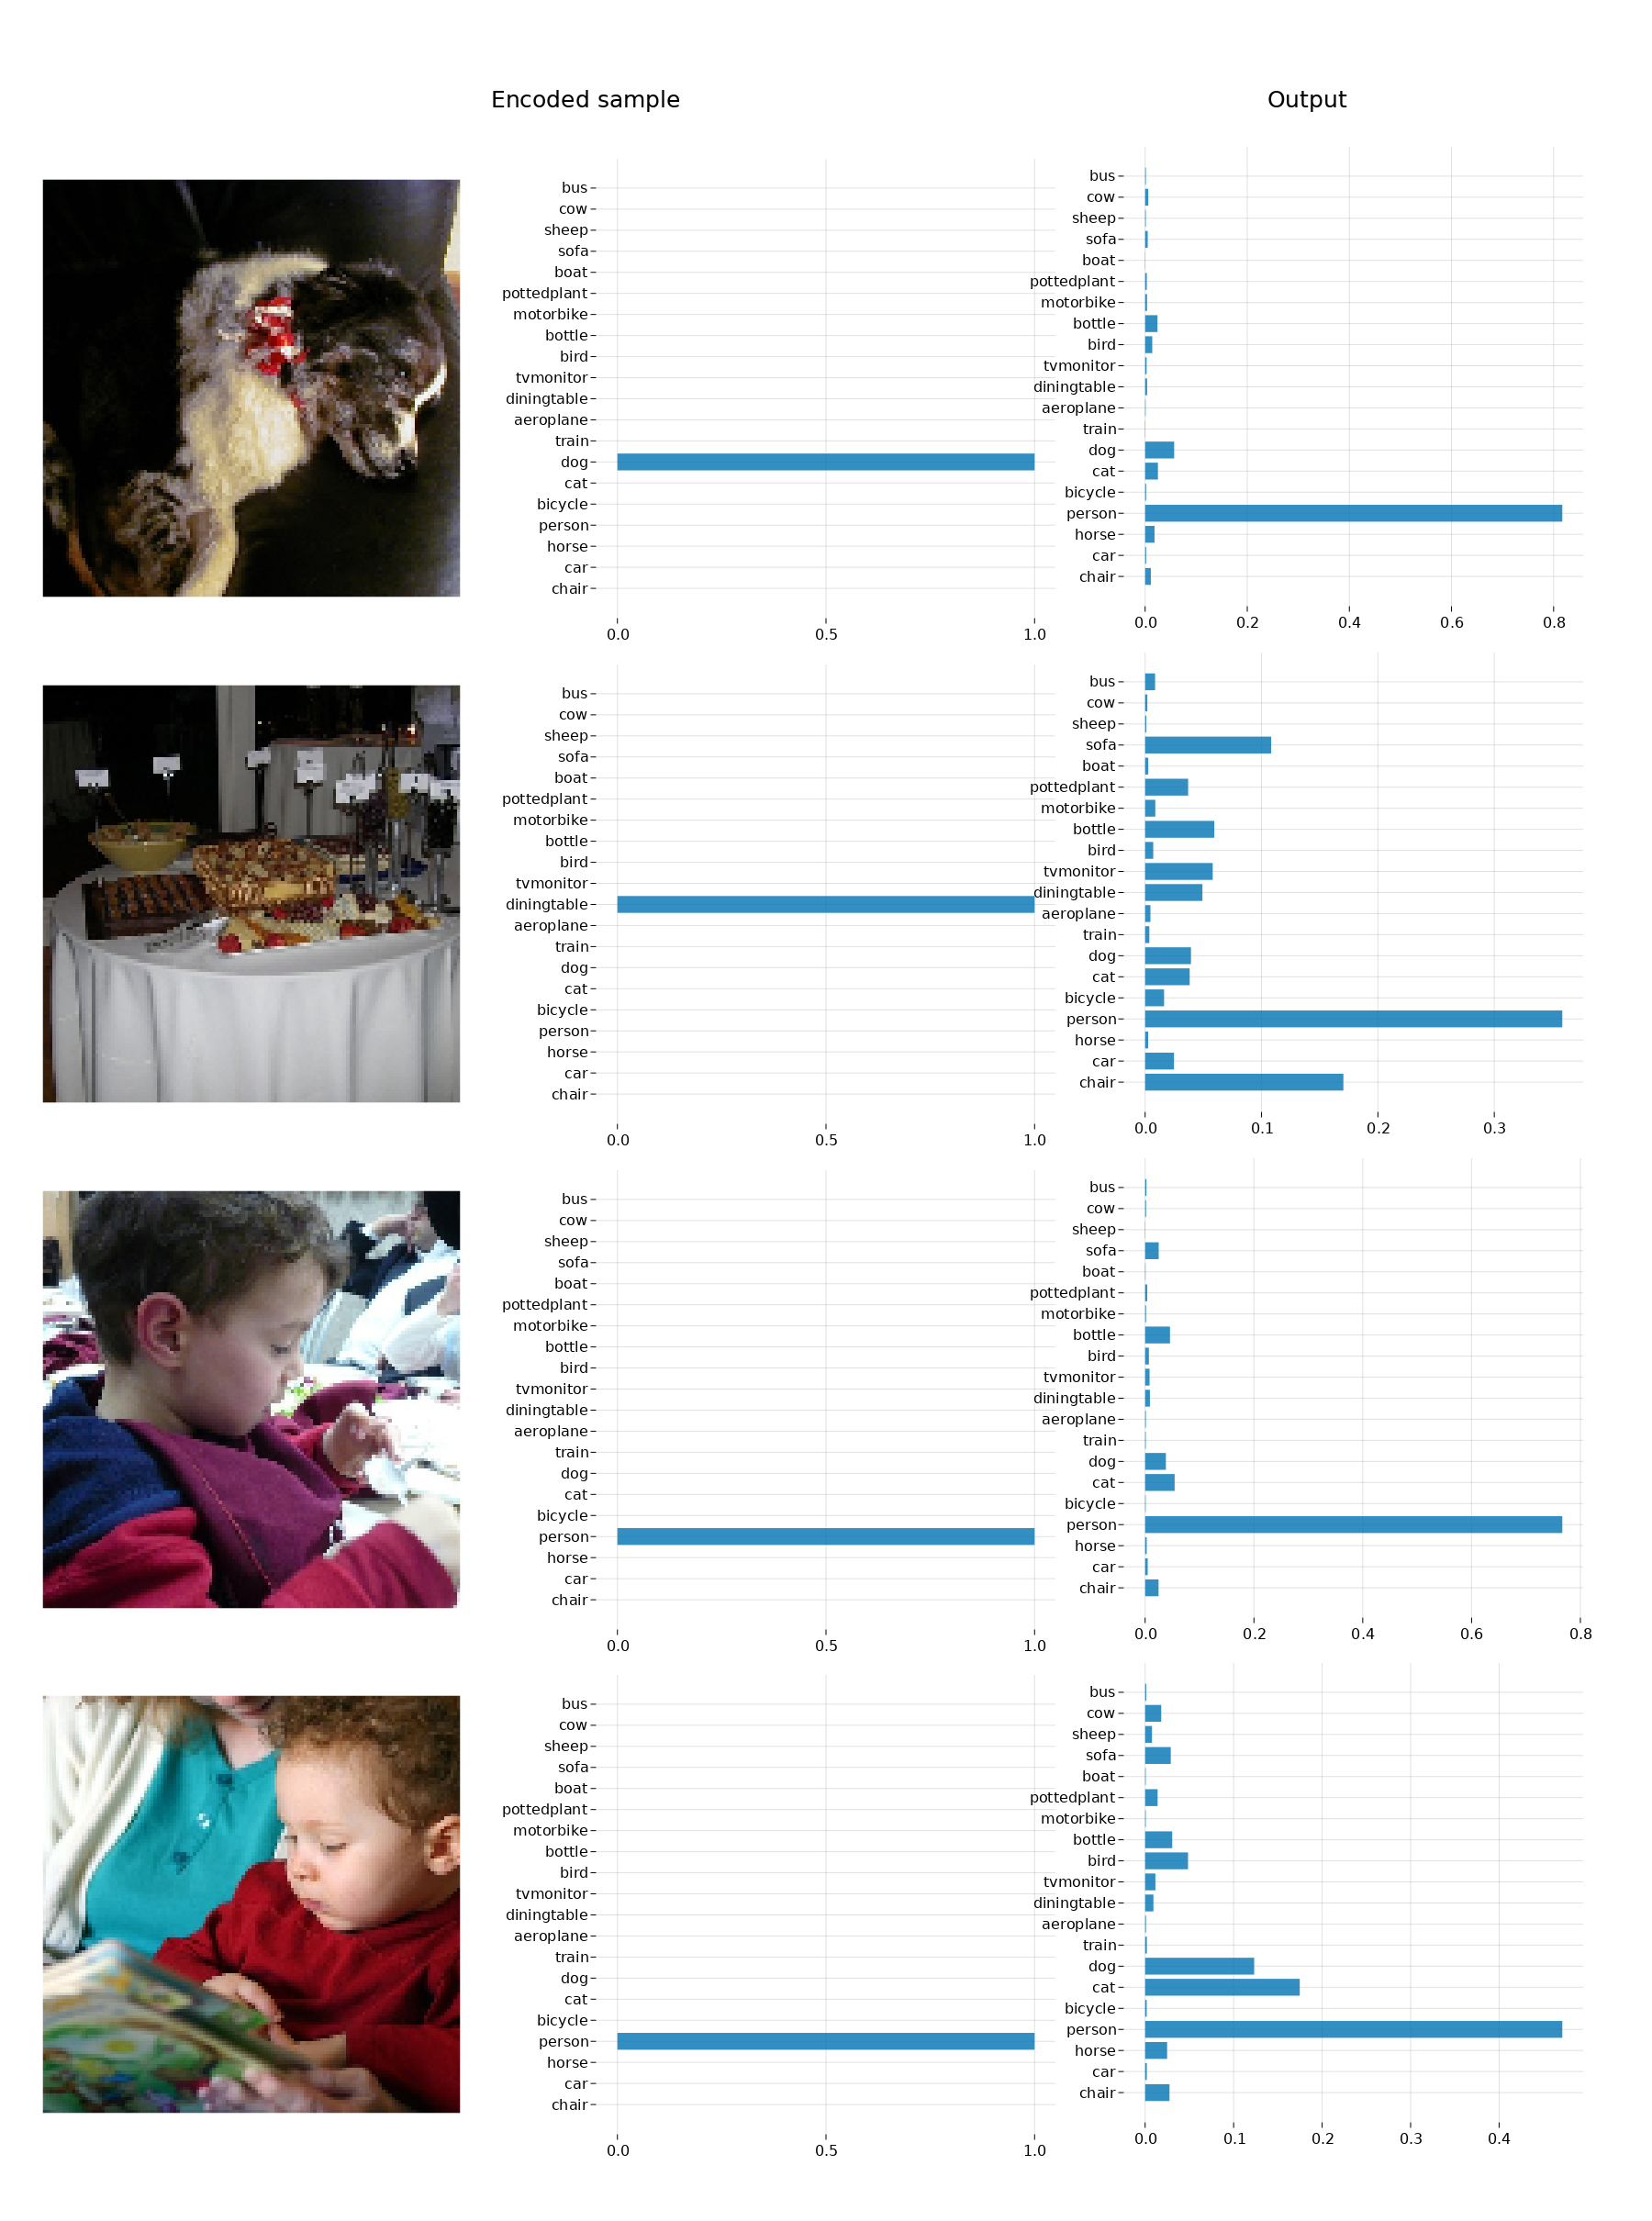

In [18]:
showoutputs(task, learner)

### Segmentation 

In [33]:
data, blocks = loaddataset("camvid_tiny", (Image, Mask))
task = ImageSegmentation(blocks)
learner = tasklearner(task, data, callbacks=[ToGPU()])
fitonecycle!(learner, 10, 0.1)

Epoch 1 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:01


┌───────────────┬───────┬────────┐
│         Phase │ Epoch │   Loss │
├───────────────┼───────┼────────┤
│ TrainingPhase │   1.0 │ 3.5564 │
└───────────────┴───────┴────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │   1.0 │ 3.69546 │
└─────────────────┴───────┴─────────┘


Epoch 2 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:02


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │   2.0 │ 3.07527 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │   2.0 │ 161.498 │
└─────────────────┴───────┴─────────┘


Epoch 3 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:02


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │   3.0 │ 2.51556 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │   3.0 │ 70.3467 │
└─────────────────┴───────┴─────────┘


Epoch 4 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:02


┌───────────────┬───────┬────────┐
│         Phase │ Epoch │   Loss │
├───────────────┼───────┼────────┤
│ TrainingPhase │   4.0 │ 1.9643 │
└───────────────┴───────┴────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │   4.0 │ 4.44282 │
└─────────────────┴───────┴─────────┘


Epoch 5 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:02


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │   5.0 │ 1.77354 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │   5.0 │ 2.79239 │
└─────────────────┴───────┴─────────┘


Epoch 6 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:02


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │   6.0 │ 1.70444 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │   6.0 │ 2.10786 │
└─────────────────┴───────┴─────────┘


Epoch 7 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:01


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │   7.0 │ 1.66732 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │   7.0 │ 1.80765 │
└─────────────────┴───────┴─────────┘


Epoch 8 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:02


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │   8.0 │ 1.64187 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │   8.0 │ 1.74117 │
└─────────────────┴───────┴─────────┘


Epoch 9 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:02


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │   9.0 │ 1.60915 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │   9.0 │ 1.69404 │
└─────────────────┴───────┴─────────┘


Epoch 10 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:02


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │  10.0 │ 1.61496 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬────────┐
│           Phase │ Epoch │   Loss │
├─────────────────┼───────┼────────┤
│ ValidationPhase │  10.0 │ 1.6875 │
└─────────────────┴───────┴────────┘


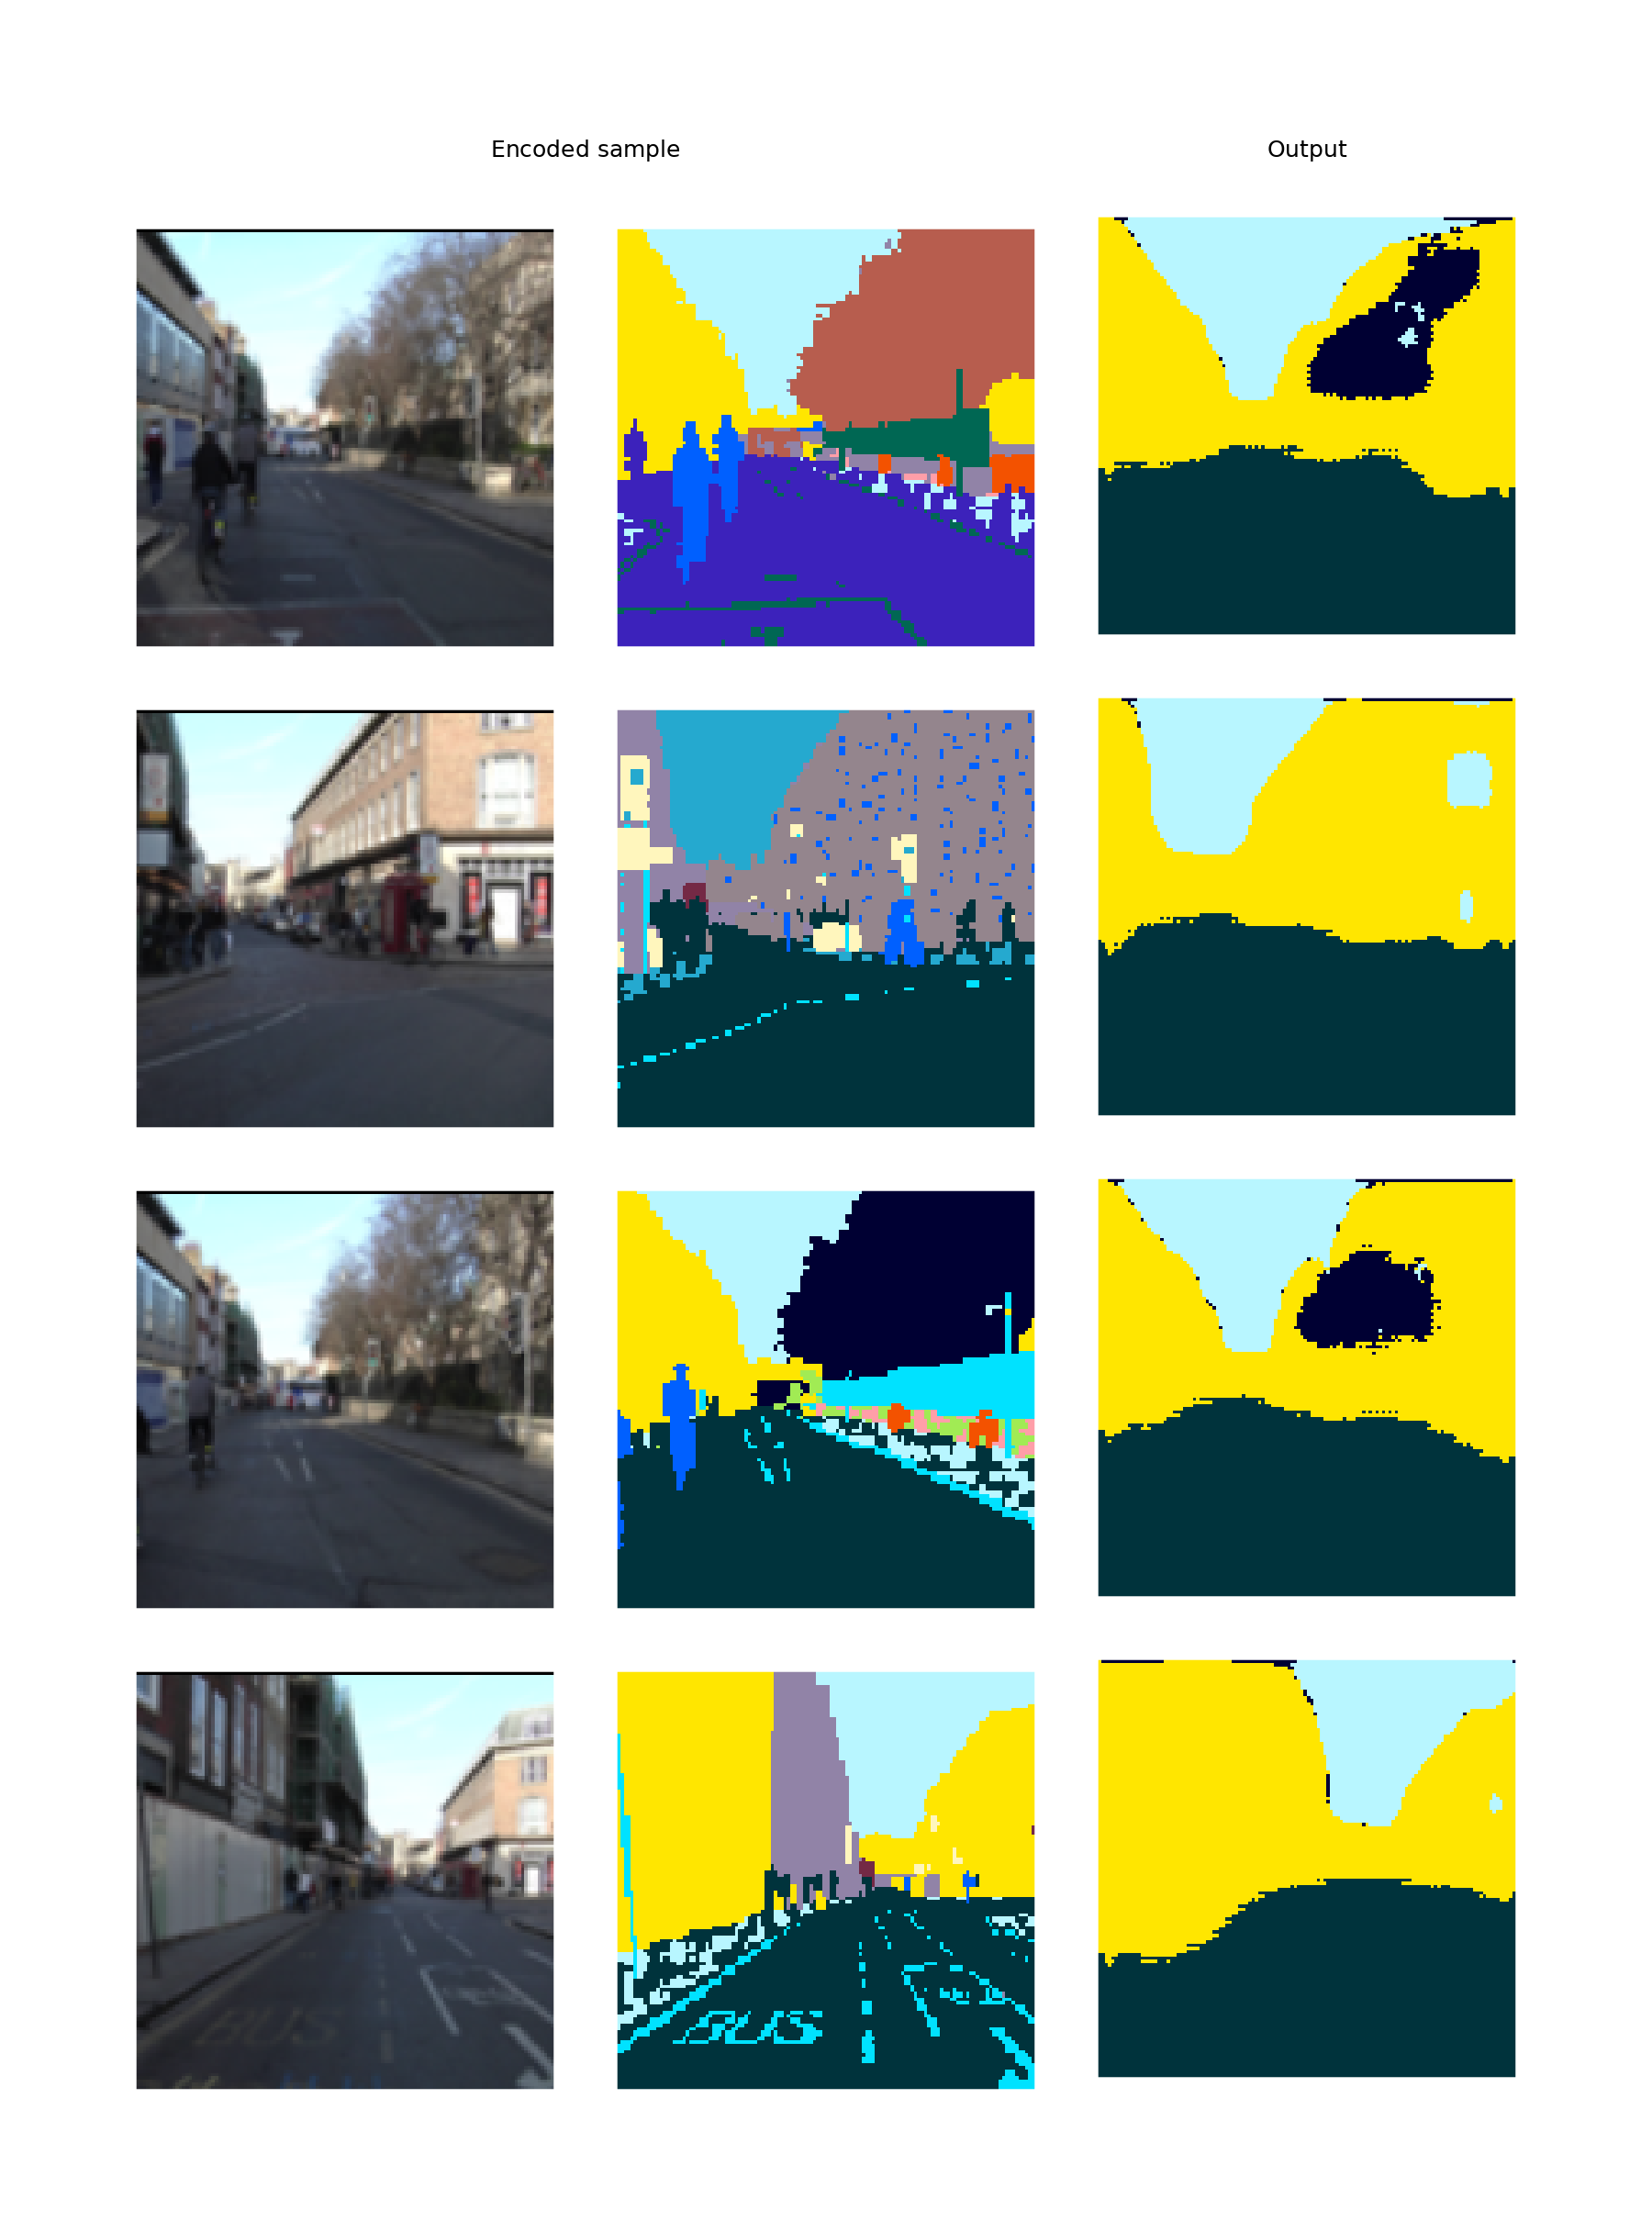

In [34]:
showoutputs(task, learner)

## Tabular data 

### Classification 

In [35]:
data, blocks = loaddataset("adult_sample", (TableRow, Label))
task = TabularClassificationSingle(blocks, data)
learner = tasklearner(task, data; callbacks=[Metrics(accuracy)], batchsize=128)
fitonecycle!(learner, 3, 0.2)

┌ Warning: There is a missing value present for category 'occupation' which will be removed from Categorify dict
└ @ DataAugmentation /home/lorenz/.julia/dev/DataAugmentation/src/rowtransforms.jl:108
Epoch 1 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:03


┌───────────────┬───────┬────────┬──────────┐
│         Phase │ Epoch │   Loss │ Accuracy │
├───────────────┼───────┼────────┼──────────┤
│ TrainingPhase │   1.0 │ 0.3823 │  0.82343 │
└───────────────┴───────┴────────┴──────────┘
┌─────────────────┬───────┬─────────┬──────────┐
│           Phase │ Epoch │    Loss │ Accuracy │
├─────────────────┼───────┼─────────┼──────────┤
│ ValidationPhase │   1.0 │ 0.31932 │  0.85017 │
└─────────────────┴───────┴─────────┴──────────┘


Epoch 2 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:03


┌───────────────┬───────┬─────────┬──────────┐
│         Phase │ Epoch │    Loss │ Accuracy │
├───────────────┼───────┼─────────┼──────────┤
│ TrainingPhase │   2.0 │ 0.34991 │  0.83775 │
└───────────────┴───────┴─────────┴──────────┘
┌─────────────────┬───────┬─────────┬──────────┐
│           Phase │ Epoch │    Loss │ Accuracy │
├─────────────────┼───────┼─────────┼──────────┤
│ ValidationPhase │   2.0 │ 0.37026 │  0.83396 │
└─────────────────┴───────┴─────────┴──────────┘


Epoch 3 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:03


┌───────────────┬───────┬─────────┬──────────┐
│         Phase │ Epoch │    Loss │ Accuracy │
├───────────────┼───────┼─────────┼──────────┤
│ TrainingPhase │   3.0 │ 0.32316 │  0.85015 │
└───────────────┴───────┴─────────┴──────────┘


Epoch 3 ValidationPhase(): 100%|████████████████████████| Time: 0:00:00


┌─────────────────┬───────┬─────────┬──────────┐
│           Phase │ Epoch │    Loss │ Accuracy │
├─────────────────┼───────┼─────────┼──────────┤
│ ValidationPhase │   3.0 │ 0.30751 │  0.85229 │
└─────────────────┴───────┴─────────┴──────────┘


In [36]:
showoutputs(task, learner, backend=ShowText())

┌─────────────────────────────────────────────────────────────┬──────────────────────────────────┐
│ Encoded sample                                              │ Output                           │
├─────────────────────────────────────────────────────────────┼──────────────────────────────────┤
│ ┌──────────────────────┬──────────────────────────────────┐ │          ┌                    ┐  │
│ │ EncodedTableRow(...) │          ┌                    ┐  │ │    >=50k ┤■■■■■■■■■■■■■ 0.701    │
│ │                      │    >=50k ┤■■■■■■■■■■■■■■■ 1.0    │ │     <50k ┤■■■■■■ 0.299           │
│ │                      │     <50k ┤ 0.0                   │ │          └                    ┘  │
│ │                      │          └                    ┘  │ │                                  │
│ └──────────────────────┴──────────────────────────────────┘ │                                  │
│                                                             │                                  │
├─────────